In [2]:
!pip install https://files.pythonhosted.org/packages/20/03/61d9950a0b83386b668a300370e40a81b5c919afdc9b7c41d20bb9021215/python-gantt-0.6.0.tar.gz

    100% |████████████████████████████████| 61kB 1.7MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 3.3MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 11.2MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 5.5MB/s eta 0:00:01
  Running setup.py bdist_wheel for python-gantt ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/51/aa/02/672bca6debc072c12d8ee12ccd8bfb1cfa2af09ec8151121b9
Successfully built python-gantt
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.
pyasn1-modules 0.2.1 has requirement pyasn1<0.5.0,>=0.4.1, but you'll have pyasn1 0.1.9 which is incompatible.


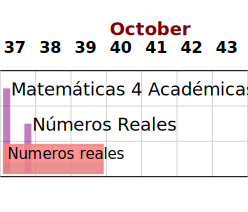

In [49]:
# https://pypi.org/project/python-gantt/

import datetime
from datetime import timedelta, date
import gantt

gantt.define_font_attributes(fill='black', stroke='black', stroke_width=0.001,  font_family="Verdana")

#gantt
hoy = datetime.date.today()
inicio = datetime.date(2017, 9, 12)
detalle = False

# Puente Inmaculada
inicio_vacas = date(2017, 12, 6) + timedelta(days=0)  # start date
vacaciones = 3  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

# Navidad
inicio_vacas = date(2017, 12, 23) + timedelta(days=0)  # start date
vacaciones = 16  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))
    
# Semana Santa
inicio_vacas = date(2018, 3, 29) + timedelta(days=0)  # start date
vacaciones = 11  # end date
for i in range(vacaciones):
    gantt.add_vacations(inicio_vacas + timedelta(days=i + 1))

p = gantt.Project(name='Matemáticas 4 Académicas', color='#FFFF40')

p0 = gantt.Project(name='Presentación', color='#FFFF40')
t01 = gantt.Task(name='Presentación',start = inicio, duration=1, color="#FF8080", display=detalle)

p0.add_task(t01)

# Tema 1
p1 = gantt.Project(name='Números Reales', color='#FFFF40')
t11 = gantt.Task(name='Representación de números reales',depends_of=t01, duration=5, color="#FF8080", display=detalle)
t12 = gantt.Task(name='Números radicales',depends_of=t11, duration=10, color="#FF8080", display=detalle)
t13 = gantt.Task(name='Logaritmos',depends_of=t12, duration=10, color="#FF8080", display=detalle)
t10 = gantt.Task(name='Numeros reales', start=t11.start_date(), duration = 10 ,color="#FF8080", display= not(detalle))

p1.add_task(t11)
p1.add_task(t12)
p1.add_task(t13)
p1.add_task(t10)

# Añadir los temas
p.add_task(p0)
p.add_task(p1)


# Crear el svg

p.make_svg_for_tasks(filename='prueba.svg', scale=gantt.DRAW_WITH_WEEKLY_SCALE, title_align_on_left=False)
#p.make_svg_for_tasks(filename='prueba.svg')


from IPython.core.display import SVG
SVG(filename='prueba.svg')


In [11]:
gantt.Task?